In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import numpy as np

In [ ]:
df = pd.read_csv("customer_churn.csv")

Exploring data

In [ ]:
df.head()

,CustomerID,Age,Gender,City,TenureMonths,TotalPurchases,AveragePurchaseValue,TotalSpend,MonthlySpend,SessionsPerMonth,AvgSessionDurationMinutes,PagesViewedPerSession,SupportTickets,DeviceUsed,HasPremiumMembership,LastInteractionDaysAgo,Churn
0,ce743892-17ee-4549-9b74-d5a735e80946,57,Male,North Erinfort,6,8,164.03,1435.03,239.17,8,15.2,13,1,Mobile,0,122,1
1,5242176a-f013-4db0-ba7f-9acfa0c99811,51,Female,Donnabury,23,23,236.72,4845.66,210.68,29,17.2,20,5,Tablet,1,90,0
2,2b575902-975d-4cf6-a620-2cbb54d22360,49,Female,Nathanshire,13,23,208.06,4880.59,375.43,11,11.2,6,2,Mobile,0,151,0
3,27ad8adb-d1f0-4ee3-b27b-4e5201a1e723,65,Female,West Emily,31,20,158.03,2749.56,88.70,11,40.0,16,0,Desktop,1,64,0
4,13bc1446-4547-4608-9514-3febda897aec,26,Female,New Gerald,32,11,244.48,2416.89,75.53,17,55.1,11,2,Tablet,0,168,0


In [ ]:
df.shape

(10000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 10000 non-null  object 
 1   Age                        10000 non-null  int64  
 2   Gender                     10000 non-null  object 
 3   City                       10000 non-null  object 
 4   TenureMonths               10000 non-null  int64  
 5   TotalPurchases             10000 non-null  int64  
 6   AveragePurchaseValue       10000 non-null  float64
 7   TotalSpend                 10000 non-null  float64
 8   MonthlySpend               10000 non-null  float64
 9   SessionsPerMonth           10000 non-null  int64  
 10  AvgSessionDurationMinutes  10000 non-null  float64
 11  PagesViewedPerSession      10000 non-null  int64  
 12  SupportTickets             10000 non-null  int64  
 13  DeviceUsed                 10000 non-null  obje

Data Cleaning

In [ ]:
#checking for null values
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
City,0
TenureMonths,0
TotalPurchases,0
AveragePurchaseValue,0
TotalSpend,0
MonthlySpend,0
SessionsPerMonth,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

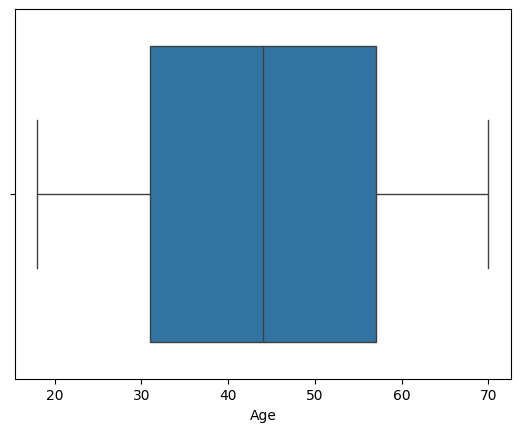

In [ ]:
#outlier detection
sns.boxplot(x=df['Age'])
plt.show()
df = df[(df['Age'] >= df['Age'].mean() - 3*df['Age'].std()) &
(df['Age'] <= df['Age'].mean() + 3*df['Age'].std())]

In [ ]:
df['Gender'] = df['Gender'].astype('category')

# 2. Create the new numerical column 'Is_Male' using cat.codes
# Since 'Female' comes before 'Male' alphabetically, this automatically assigns:
# Female = 0
# Male = 1
df['Gender_num'] = df['Gender'].cat.codes

# 3. Drop the original 'Gender' column from the df table
df = df.drop(columns=['Gender'])

In [ ]:
df

,CustomerID,Age,City,TenureMonths,TotalPurchases,AveragePurchaseValue,TotalSpend,MonthlySpend,SessionsPerMonth,AvgSessionDurationMinutes,PagesViewedPerSession,SupportTickets,DeviceUsed,HasPremiumMembership,LastInteractionDaysAgo,Churn,Gender_num
0,ce743892-17ee-4549-9b74-d5a735e80946,57,North Erinfort,6,8,164.03,1435.03,239.17,8,15.2,13,1,Mobile,0,122,1,1
1,5242176a-f013-4db0-ba7f-9acfa0c99811,51,Donnabury,23,23,236.72,4845.66,210.68,29,17.2,20,5,Tablet,1,90,0,0
2,2b575902-975d-4cf6-a620-2cbb54d22360,49,Nathanshire,13,23,208.06,4880.59,375.43,11,11.2,6,2,Mobile,0,151,0,0
3,27ad8adb-d1f0-4ee3-b27b-4e5201a1e723,65,West Emily,31,20,158.03,2749.56,88.70,11,40.0,16,0,Desktop,1,64,0,0
4,13bc1446-4547-4608-9514-3febda897aec,26,New Gerald,32,11,244.48,2416.89,75.53,17,55.1,11,2,Tablet,0,168,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29dc6004-551e-4fb0-a9c7-8b7fb56783cd,59,Warrenbury,30,23,166.99,3163.78,105.46,4,42.1,6,1,Tablet,1,89,0,0
9996,8a051a50-352f-4433-8f64-f8c727ef45fb,26,Lake Amy,14,2,189.22,313.43,22.39,28,26.3,21,0,Mobile,0,104,1,1
9997,30bba2e0-1484-44c2-be1a-d6f3dbd8f0e3,54,Jacobton,33,43,117.10,5865.81,177.75,21,49.3,12,1,Desktop,0,132,1,0
9998,275b62fa-89fb-4571-95f2-a88da90aa3b6,27,Lake Sarah,34,63,215.74,15245.32,448.39,7,49.6,23,0,Mobile,0,5,0,0


Data Validation

In [ ]:
#Age Validation check

MIN_AGE = 18
MAX_AGE = 100

# Identify Invalid Records: Age is outside the range [MIN_AGE, MAX_AGE]
invalid_age_records = df[
    (df['Age'] < MIN_AGE) |
    (df['Age'] > MAX_AGE)
]

num_invalid = len(invalid_age_records)

print(f"--- Age Range Validation ({MIN_AGE} <= Age <= {MAX_AGE}) ---")

if num_invalid == 0:
    print("VALIDATION SUCCESS: All values in 'Age' are within the specified range.")
else:
    print(f"VALIDATION FAILURE: Found {num_invalid} records with invalid 'Age' values.")

    # Check for negative ages specifically
    num_negative = (df['Age'] < 0).sum()
    if num_negative > 0:
        print(f"    - Found {num_negative} records with negative Age.")

    # Display the top 5 invalid records for investigation
    print("\nTop 5 Invalid Age Records (CustomerID, Age):")
    print(invalid_age_records[['CustomerID', 'Age']].head().to_markdown(index=False))

--- Age Range Validation (18 <= Age <= 100) ---
VALIDATION SUCCESS: All values in 'Age' are within the specified range.


In [ ]:
# check if no customer has a negative tenure.
non_negative_count = (df['TenureMonths'] < 0).sum()

if non_negative_count == 0:
    print("VALIDATION SUCCESS: All values in 'TenureMonths' are non-negative (>= 0)")
else:
    print(f"VALIDATION FAILURE: Found {non_negative_count} records with negative 'TenureMonths'")

VALIDATION SUCCESS: All values in 'TenureMonths' are non-negative (>= 0)


In [ ]:
#checks customers who have both very low tenure and very high total spend,

# Define thresholds
LOW_TENURE_THRESHOLD = 3  # Months
HIGH_SPEND_PERCENTILE = 0.90 # 90th percentile of TotalSpend

# Calculate the 90th percentile threshold for TotalSpend
high_spend_threshold = df['TotalSpend'].quantile(HIGH_SPEND_PERCENTILE)

# Filter for the inconsistent segment: Low Tenure AND High Spend
inconsistent_segment = df[
    (df['TenureMonths'] <= LOW_TENURE_THRESHOLD) &
    (df['TotalSpend'] >= high_spend_threshold)
]

num_inconsistent = len(inconsistent_segment)

print(f"\n--- Consistency Check (Tenure vs. Spend) ---")
print(f"High Spend Threshold (90th percentile): ${high_spend_threshold:,.2f}")
print(f"Low Tenure Threshold: {LOW_TENURE_THRESHOLD} months")

if num_inconsistent == 0:
    print(f"CONSISTENCY SUCCESS: Found no customers with tenure <= {LOW_TENURE_THRESHOLD} months AND spend >= ${high_spend_threshold:,.2f}")
else:
    print(f"CONSISTENCY WARNING: Found {num_inconsistent} customers in the inconsistent segment.")
    print("Top 5 inconsistent records (CustomerID, TenureMonths, TotalSpend):")
    # Display the top 5 records for review
    print(inconsistent_segment[['CustomerID', 'TenureMonths', 'TotalSpend']].head().to_markdown(index=False, floatfmt=",.2f"))


--- Consistency Check (Tenure vs. Spend) ---
High Spend Threshold (90th percentile): $7,618.97
Low Tenure Threshold: 3 months
CONSISTENCY SUCCESS: Found no customers with tenure <= 3 months AND spend >= $7,618.97


In [ ]:
# Checks whether all TenureMonths values are valid (i.e., not negative)

non_negative_count = (df['TenureMonths'] < 0).sum()

if non_negative_count == 0:
    print("VALIDATION SUCCESS: All values in 'TenureMonths' are non-negative (>= 0).")
else:
    print(f"VALIDATION FAILURE: Found {non_negative_count} records with negative 'TenureMonths'")

VALIDATION SUCCESS: All values in 'TenureMonths' are non-negative (>= 0).


In [ ]:
#ensure TenureMonths aligns logically with the TotalSpend

# Define thresholds
LOW_TENURE_THRESHOLD = 3  # Months
HIGH_SPEND_PERCENTILE = 0.90 # 90th percentile of TotalSpend

# Calculate the 90th percentile threshold for TotalSpend
high_spend_threshold = df['TotalSpend'].quantile(HIGH_SPEND_PERCENTILE)

# Filter for the inconsistent segment: Low Tenure AND High Spend
inconsistent_segment = df[
    (df['TenureMonths'] <= LOW_TENURE_THRESHOLD) &
    (df['TotalSpend'] >= high_spend_threshold)
]

num_inconsistent = len(inconsistent_segment)
print(f"High Spend Threshold (90th percentile): ${high_spend_threshold:,.2f}")
print(f"Number of Inconsistent Records Found: {num_inconsistent}")

High Spend Threshold (90th percentile): $7,618.97
Number of Inconsistent Records Found: 0


Pivot Table: Average Total Spend (USD) by Membership and Gender

In [ ]:
pivot_table = df.pivot_table(values='TotalSpend', index='HasPremiumMembership', columns='Gender_num', aggfunc='mean')
print(pivot_table.to_markdown())

|   HasPremiumMembership |       0 |       1 |
|-----------------------:|--------:|--------:|
|                      0 | 3010.7  | 3016.76 |
|                      1 | 2978.13 | 3109.71 |


Cross-Tabulation: Customer Count by Premium Membership and Churn Status

In [ ]:
cross_tab = pd.crosstab(df['HasPremiumMembership'], df['Churn'])
print(cross_tab.to_markdown())

|   HasPremiumMembership |    0 |    1 |
|-----------------------:|-----:|-----:|
|                      0 | 3358 | 1583 |
|                      1 | 4029 | 1030 |


What is the overall churn rate

/tmp/ipython-input-1696033370.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn_Status', data=df, order=['No Churn', 'Churned'],palette = {'No Churn': '#16A085', 'Churned': '#E67E22'})
/tmp/ipython-input-1696033370.py:11: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(f'Overall Churn Rate:\n{churn_rate_formatted}', xy=(0.5, 0.95), textcoords='axes fraction', ha='center', fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.6))


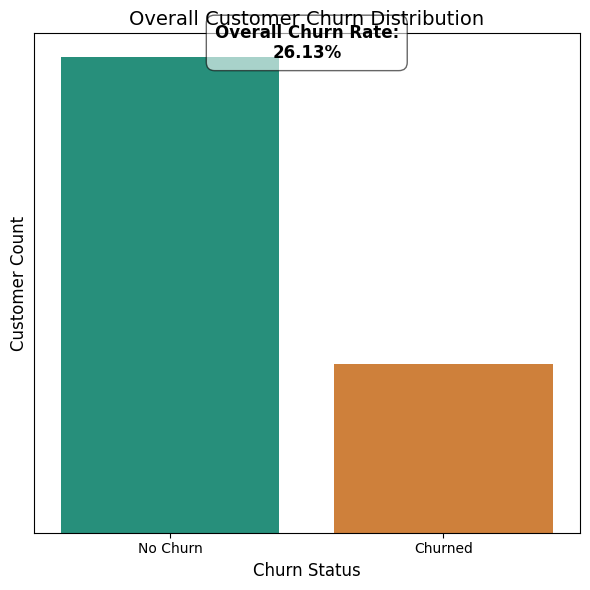

In [ ]:
# Map Churn Status and calculate rate
df['Churn_Status'] = df['Churn'].map({0: 'No Churn', 1: 'Churned'})
churn_rate = df['Churn'].mean() * 100
churn_rate_formatted = f"{churn_rate:.2f}%"

# Create the bar chart
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Churn_Status', data=df, order=['No Churn', 'Churned'],palette = {'No Churn': '#16A085', 'Churned': '#E67E22'})

# Add the churn rate percentage annotation
ax.annotate(f'Overall Churn Rate:\n{churn_rate_formatted}', xy=(0.5, 0.95), textcoords='axes fraction', ha='center', fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.6))

plt.title('Overall Customer Churn Distribution', fontsize=14)
plt.ylabel('Customer Count', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)
plt.yticks([]) # Hide y-axis ticks for a cleaner, proportional view
plt.tight_layout()
plt.show()

Which age group has the highest churn?

In [ ]:
# 1. Create Age Groups
bins = [18, 30, 45, 60, 100]
labels = ['18-30 (Young)', '31-45 (Middle)', '46-60 (Senior)', '60+ (Retiree)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 2. Calculate Churn Rate by Age Group
churn_by_age = df.groupby('Age_Group')['Churn'].agg(['mean', 'count'])
churn_by_age.rename(columns={'mean': 'Churn_Rate', 'count': 'Total_Customers'}, inplace=True)
churn_by_age['Churn_Rate'] = churn_by_age['Churn_Rate'] * 100 # Convert to percentage

print("--- Churn Rate (%) by Age Group ---")
print(churn_by_age.sort_values('Churn_Rate', ascending=False).to_markdown(floatfmt=".2f"))

--- Churn Rate (%) by Age Group ---
| Age_Group      |   Churn_Rate |   Total_Customers |
|:---------------|-------------:|------------------:|
| 46-60 (Senior) |        26.68 |           2826.00 |
| 31-45 (Middle) |        26.25 |           2865.00 |
| 18-30 (Young)  |        25.83 |           2242.00 |
| 60+ (Retiree)  |        25.54 |           2067.00 |


/tmp/ipython-input-4248635081.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('Age_Group')['Churn'].agg(['mean', 'count'])


Does premium membership help reduce reduce churn rate?

In [ ]:
# Ensure Gender is numeric for aggregation (using 0/1 for now)
# df['Gender_num'] = df['Gender'].astype('category').cat.codes # This line is no longer needed as Gender_num already exists

# Create a combined segment column
df['Segment'] = df['HasPremiumMembership'].astype(str) + '_' + df['Gender_num'].astype(str)
# Rename the combined segments for clarity
df['Segment'] = df['Segment'].map({
    '0_0': 'NoPremium_Female',
    '1_0': 'HasPremium_Female',
    '0_1': 'NoPremium_Male',
    '1_1': 'HasPremium_Male'
})

#Calculate Churn Rate by Segment
churn_by_segment = df.groupby('Segment')['Churn'].mean().reset_index()
churn_by_segment['Churn_Rate'] = churn_by_segment['Churn'] * 100

print("\n--- Churn Rate (%) by Premium Status and Gender ---")
print(churn_by_segment[['Segment', 'Churn_Rate']].sort_values('Churn_Rate', ascending=False).to_markdown(index=False, floatfmt=".2f"))


--- Churn Rate (%) by Premium Status and Gender ---
| Segment           |   Churn_Rate |
|:------------------|-------------:|
| NoPremium_Male    |        32.10 |
| NoPremium_Female  |        31.97 |
| HasPremium_Female |        20.77 |
| HasPremium_Male   |        19.95 |


Do customers with low sessions per month or short session duation churn more?

/tmp/ipython-input-3576014622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn_Status', y='SessionsPerMonth', data=df, ax=axes[0],palette=palette_colors)
/tmp/ipython-input-3576014622.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn_Status', y='AvgSessionDurationMinutes', data=df, ax=axes[1],palette=palette_colors)


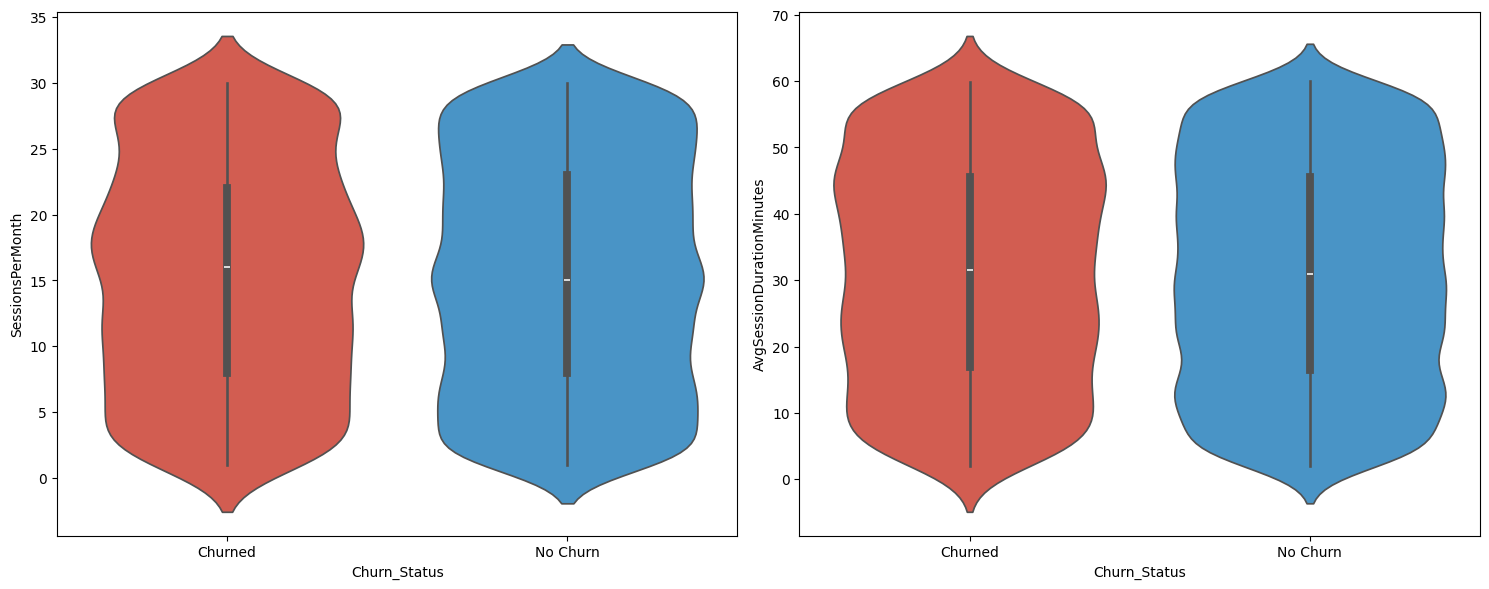

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
palette_colors = {'No Churn': '#3498DB', 'Churned': '#E74C3C'} # Blue for No Churn, Red for Churned

# Sessions Per Month vs. Churn
sns.violinplot(x='Churn_Status', y='SessionsPerMonth', data=df, ax=axes[0],palette=palette_colors)
# Average Session Duration vs. Churn
sns.violinplot(x='Churn_Status', y='AvgSessionDurationMinutes', data=df, ax=axes[1],palette=palette_colors)
plt.tight_layout()
plt.show()

Do frequent buyers churn less?

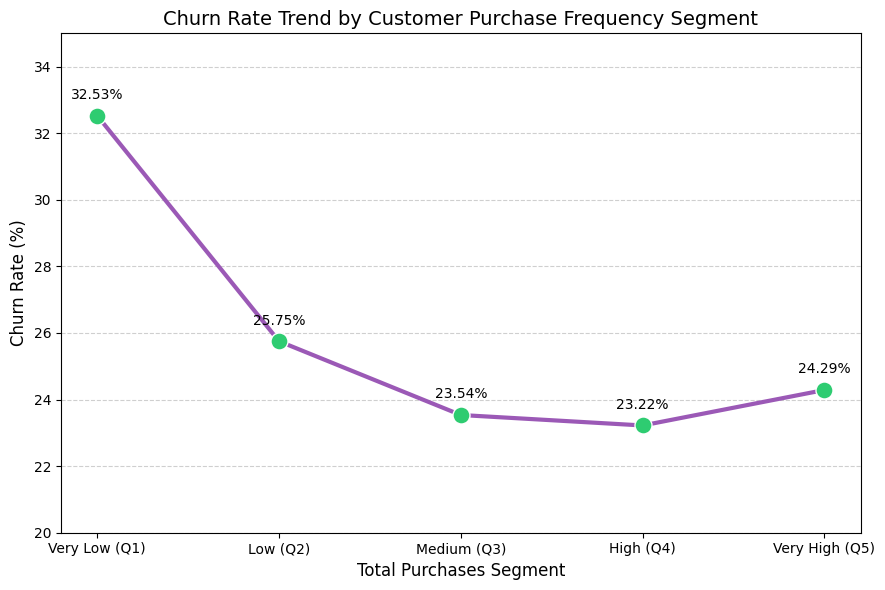

In [ ]:
#Churn Rate Trend by Purchase Segment (Line Plot)

# Define Purchase Groups (Quantile-based bins for balanced segments)
# Divide TotalPurchases into 5 equal-sized groups (quintiles)
# 'qcut' ensures each segment has roughly the same number of customers
df['Purchase_Group'] = pd.qcut(df['TotalPurchases'], q=5, labels=False, duplicates='drop')

# Map the numerical bins to descriptive labels
purchase_labels = {
    0: 'Very Low (Q1)',
    1: 'Low (Q2)',
    2: 'Medium (Q3)',
    3: 'High (Q4)',
    4: 'Very High (Q5)'
}
df['Purchase_Segment'] = df['Purchase_Group'].map(purchase_labels)


#Calculate Churn Rate by Purchase Segment (Creating 'churn_by_purchase')
churn_by_purchase = df.groupby('Purchase_Segment', observed=True)['Churn'].mean().reset_index()
churn_by_purchase.rename(columns={'Churn': 'Churn_Rate'}, inplace=True)
churn_by_purchase['Churn_Rate'] = churn_by_purchase['Churn_Rate'] * 100 # Convert to percentage

# Define the correct order for plotting
order = list(purchase_labels.values())
churn_by_purchase.set_index('Purchase_Segment', inplace=True)
churn_by_purchase = churn_by_purchase.loc[order].reset_index()


# --- Visualization: Line Plot (This requires 'churn_by_purchase') ---

plt.figure(figsize=(9, 6))

# Plotting the trend line
sns.lineplot(
    x='Purchase_Segment',
    y='Churn_Rate',
    data=churn_by_purchase,
    marker='o',
    markersize=10,
    color='#9b59b6', # Purple line color
    linewidth=3
)

# Plotting the markers (scatter plot on the same axis)
sns.scatterplot(
    x='Purchase_Segment',
    y='Churn_Rate',
    data=churn_by_purchase,
    s=150,
    color='#2ecc71', # Green markers
    zorder=5
)

# Add annotations to markers
for index, row in churn_by_purchase.iterrows():
    plt.text(
        index,
        row['Churn_Rate'] + 0.5,
        f"{row['Churn_Rate']:.2f}%",
        color='black',
        ha="center",
        fontsize=10
    )

plt.title('Churn Rate Trend by Customer Purchase Frequency Segment', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Total Purchases Segment', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(20, 35)
plt.tight_layout()
plt.show()

Do Customers Who Raise More Support Tickets Churn More Often?

In [ ]:
# Map Churn Status for clear labels
df['Churn_Status'] = df['Churn'].map({0: 'No Churn', 1: 'Churned'})

# Data Aggregation: Calculate the mean number of support tickets by churn status
avg_tickets = df.groupby('Churn_Status')['SupportTickets'].mean().reset_index()

print("--- Average Support Tickets by Churn Status ---")
print(avg_tickets.to_markdown(index=False, floatfmt=".2f"))

#Yes, the data indicates that customers who churn raise more support tickets on average than those who remain loyal.

--- Average Support Tickets by Churn Status ---
| Churn_Status   |   SupportTickets |
|:---------------|-----------------:|
| Churned        |             3.16 |
| No Churn       |             2.27 |


Revenue Analysis

Which type of customer (premium vs normal) brings in more revenue?

In [ ]:
# Map HasPremiumMembership (1=Premium, 0=Normal) for clear labels
df['Membership_Status'] = df['HasPremiumMembership'].map({1: 'Premium', 0: 'Normal (Non-Premium)'})

# Data Aggregation: Calculate the mean TotalSpend for each membership status
# TotalSpend is used as the measure of lifetime revenue brought in by the customer.
avg_spend_by_membership = df.groupby('Membership_Status')['TotalSpend'].mean().reset_index()

print("--- Average Total Lifetime Spend by Membership Status ---")
print(avg_spend_by_membership.to_markdown(index=False, floatfmt=",.2f"))
#The difference is only about $30 in average lifetime spend, suggesting that premium membership itself, while strongly linked to loyalty (lower churn), does not significantly increase the customer's overall lifetime revenue contribution in terms of total spending compared to non-premium customers.

--- Average Total Lifetime Spend by Membership Status ---
| Membership_Status    |   TotalSpend |
|:---------------------|-------------:|
| Normal (Non-Premium) |     3,013.78 |
| Premium              |     3,043.96 |


Which city/region has the highest revenue contribution?

In [ ]:
#Calculate Total Spend (Revenue) per City
city_revenue = df.groupby('City')['TotalSpend'].sum().reset_index()
city_revenue.rename(columns={'TotalSpend': 'TotalRevenueContribution'}, inplace=True)

# Sort and select the top 10 cities
top_10_cities = city_revenue.sort_values('TotalRevenueContribution', ascending=False).head(10)

print("--- Top 10 Cities by Total Revenue Contribution (TotalSpend) ---")
print(top_10_cities.to_markdown(index=False, floatfmt=",.2f"))
#The analysis reveals that Port David has the highest revenue contribution, followed closely by Lake Sarah.

--- Top 10 Cities by Total Revenue Contribution (TotalSpend) ---
| City            |   TotalRevenueContribution |
|:----------------|---------------------------:|
| Port David      |                  48,167.80 |
| Lake Sarah      |                  47,456.19 |
| Port Michael    |                  44,729.60 |
| North Michael   |                  42,923.90 |
| Brownmouth      |                  40,338.37 |
| New Timothy     |                  40,160.99 |
| Smithshire      |                  38,763.72 |
| New Christopher |                  38,151.64 |
| Thomasburgh     |                  37,474.18 |
| Port Robert     |                  37,267.94 |


If churn is reduced by 10%, how much extra revenue can we save?

<Figure size 1200x1200 with 0 Axes>

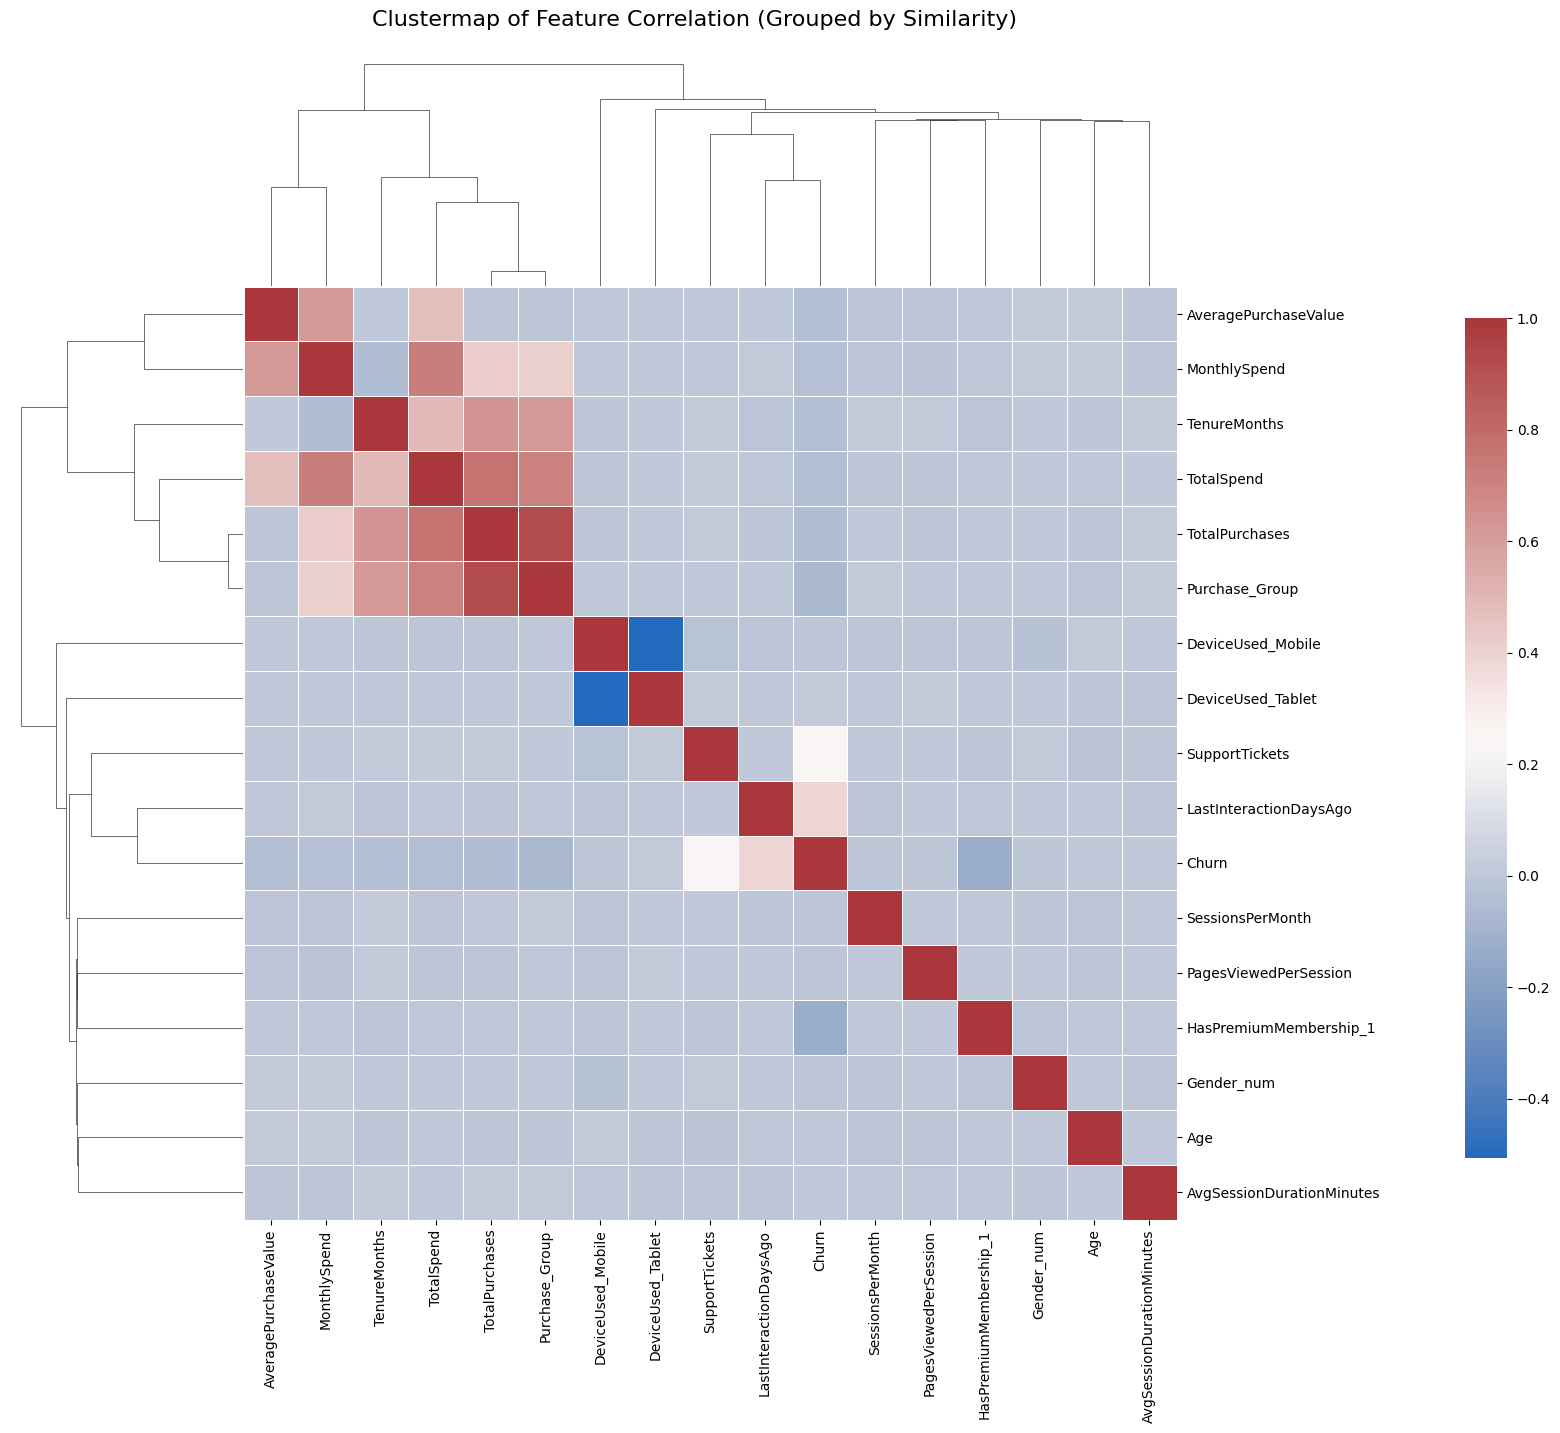

In [ ]:
# We only use numerical or encoded columns for the matrix
# Exclude non-numeric columns and the original ID/City columns
columns_to_drop = ['CustomerID', 'City', 'Age_Group', 'Churn_Status', 'Segment', 'Purchase_Segment', 'Membership_Status']
df_numeric = df.drop(columns=columns_to_drop, errors='ignore')

categorical_features = ['DeviceUsed', 'HasPremiumMembership'] # Use DeviceUsed and HasPremiumMembership for one-hot encoding
df_encoded = pd.get_dummies(df_numeric, columns=categorical_features, drop_first=True)

#Calculate the Correlation Matrix
corr_matrix = df_encoded.corr()

#Create the Clustermap
plt.figure(figsize=(12, 12))
sns.clustermap(
    corr_matrix,
    annot=False,            # Set to True to see values, but can be messy
    cmap='vlag',            # Blue-White-Red diverging palette
    linewidths=0.5,
    figsize=(14, 14),
    fmt=".2f",
    cbar_pos=(1.05, 0.2, 0.03, 0.6) # Position color bar
)

plt.suptitle("Clustermap of Feature Correlation (Grouped by Similarity)", y=1.02, fontsize=16)
plt.show()

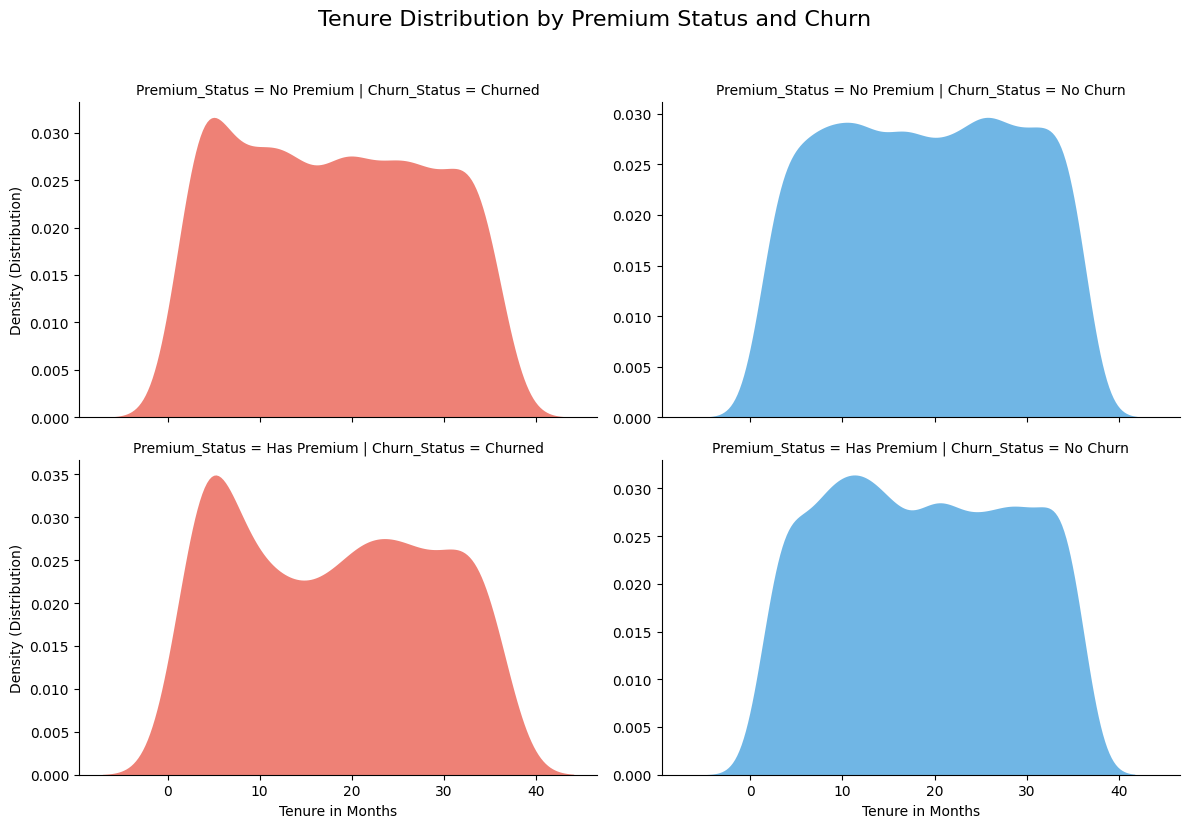

In [ ]:
#Map categorical columns for clear labeling in the grid
df['Churn_Status'] = df['Churn'].map({0: 'No Churn', 1: 'Churned'})
df['Premium_Status'] = df['HasPremiumMembership'].map({1: 'Has Premium', 0: 'No Premium'})

# Create the FacetGrid
g = sns.FacetGrid(
    df,
    row='Premium_Status',
    col='Churn_Status',
    hue='Churn_Status',
    sharey=False,
    height=4,
    aspect=1.5,
    palette={'Churned': '#E74C3C', 'No Churn': '#3498DB'} # Red/Blue for clarity
)

# Map a KDE plot (similar to a smoothed histogram)
g.map(sns.kdeplot, 'TenureMonths', fill=True, alpha=0.7, linewidth=0)

# Add title and labels
g.fig.suptitle('Tenure Distribution by Premium Status and Churn', fontsize=16, y=1.03)
g.set_axis_labels("Tenure in Months", "Density (Distribution)")
g.tight_layout()
plt.show()

Churn Rate Heatmap by Device Used and Premium Status

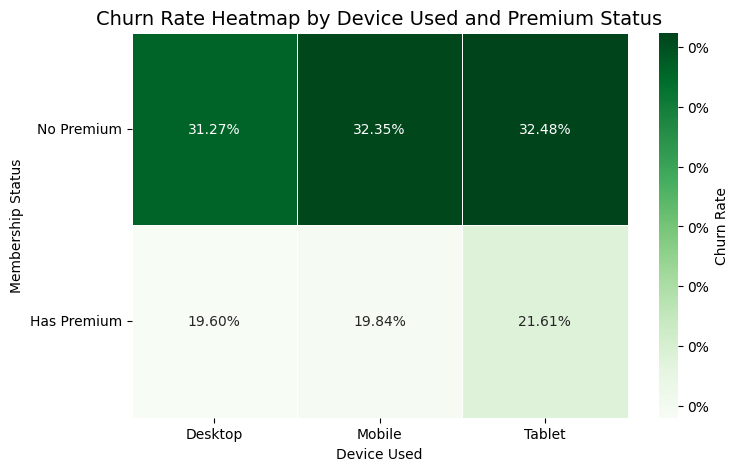

In [ ]:
#Calculate the Churn Rate Cross-Tabulation
# Pivot table calculates the mean of 'Churn' (which is the churn rate)
churn_rate_matrix = df.pivot_table(
    values='Churn',
    index='HasPremiumMembership',
    columns='DeviceUsed',
    aggfunc='mean'
)

#Map index/columns for readability
churn_rate_matrix.index = ['No Premium', 'Has Premium']

#Create the Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    churn_rate_matrix,
    annot=True,
    fmt=".2%",             # Display values as percentages
    cmap='Greens',          # Sequential color palette (darker = higher churn)
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'format': '%.0f%%', 'label': 'Churn Rate'}
)

plt.title('Churn Rate Heatmap by Device Used and Premium Status', fontsize=14)
plt.ylabel('Membership Status')
plt.xlabel('Device Used')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

Is there a statistically significant relationship between having a Premium Membership and a customer churning, and if so, how large is the risk difference?
Which customer group should we target with discounts to prevent churn?

In [ ]:
from scipy.stats import chi2_contingency
#Create the Contingency Table (Observed Frequencies)
contingency_table = pd.crosstab(
    df['HasPremiumMembership'],
    df['Churn']
)
#Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\n--- Chi-Square Test Results ---")
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p_value:.10f}")
print(f"Degrees of Freedom: {dof}")

# Calculate churn rates by membership status
churn_rate_no_premium = contingency_table.loc[0, 1] / contingency_table.loc[0].sum()
churn_rate_premium = contingency_table.loc[1, 1] / contingency_table.loc[1].sum()

print("\n--- Churn Rates by Membership Status ---")
print(f"No Premium Churn Rate: {churn_rate_no_premium:.2%}")
print(f"Has Premium Churn Rate: {churn_rate_premium:.2%}")


--- Chi-Square Test Results ---
Chi-Square Statistic: 176.012
P-value: 0.0000000000
Degrees of Freedom: 1

--- Churn Rates by Membership Status ---
No Premium Churn Rate: 32.04%
Has Premium Churn Rate: 20.36%


Is there a statistically significant difference in the Average Total Spend among customers who use a Mobile, Desktop, or Tablet?

In [ ]:
import pandas as pd
from scipy import stats

#Separate the numerical data into groups based on the categorical variable (DeviceUsed)
device_groups = df.groupby('DeviceUsed')['TotalSpend'].apply(list)

# Extract the TotalSpend data for each of the three groups
mobile_spend = device_groups['Mobile']
desktop_spend = device_groups['Desktop']
tablet_spend = device_groups['Tablet']

# Perform the One-Way ANOVA Test
# H0 (Null Hypothesis): The mean TotalSpend is the same for all three device groups.
# H1 (Alternative Hypothesis): At least one device group has a different mean TotalSpend.
f_statistic, p_value_anova = stats.f_oneway(mobile_spend, desktop_spend, tablet_spend)

print("--- Analysis of Variance (ANOVA) Results ---")
print(f"Comparison: Total Spend by Device Used")
print(f"F-Statistic: {f_statistic:.3f}")
print(f"P-value: {p_value_anova:.10f}")

# Calculate the mean spend for each group for actionable insight
mean_spend = df.groupby('DeviceUsed')['TotalSpend'].mean().sort_values(ascending=False)
print("\n--- Average Total Spend by Device ---")
print(mean_spend.to_markdown(floatfmt=".2f"))
#If the P-value is less than 0.05 (the typical significance level), you reject the null hypothesis. This would mean that the mean spending levels are statistically different across the three device types.

--- Analysis of Variance (ANOVA) Results ---
Comparison: Total Spend by Device Used
F-Statistic: 0.271
P-value: 0.7626712698

--- Average Total Spend by Device ---
| DeviceUsed   |   TotalSpend |
|:-------------|-------------:|
| Tablet       |      3060.98 |
| Mobile       |      3023.07 |
| Desktop      |      3002.50 |


Predictive Modeling

Which customers are at high risk of churn next month?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

target_col = 'Churn'
categorical_cols = ['Gender_num', 'DeviceUsed', 'HasPremiumMembership']
numerical_cols = [
    'Age', 'TenureMonths', 'TotalPurchases', 'TotalSpend', 'SessionsPerMonth',
    'SupportTickets', 'AvgSessionDurationMinutes', 'PagesViewedPerSession',
    'AveragePurchaseValue', 'MonthlySpend', 'LastInteractionDaysAgo'
]

# Encoding and Scaling
df_encoded_cats = pd.get_dummies(df[categorical_cols], columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
df_scaled_numerical = pd.DataFrame(
    scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)
df_final = pd.concat([df_scaled_numerical, df_encoded_cats.reset_index(drop=True), df[target_col]], axis=1)
X = df_final.drop(columns=[target_col])
y = df_final[target_col]

# --- Model Training (Necessary to define coefficients) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(ascending=False)

# --- Print Statements for Statistical Results ---

print("--- Statistical Predictors of Churn (Coefficients) ---")
print("Positive coefficients increase churn risk (High Risk Drivers):")
print(coefficients.head(5).to_markdown(floatfmt=".3f"))
print("\nNegative coefficients decrease churn risk (Protective Factors):")
print(coefficients.tail(5).to_markdown(floatfmt=".3f"))

--- Statistical Predictors of Churn (Coefficients) ---
Positive coefficients increase churn risk (High Risk Drivers):
|                        |     0 |
|:-----------------------|------:|
| LastInteractionDaysAgo | 1.133 |
| SupportTickets         | 0.665 |
| TotalSpend             | 0.162 |
| DeviceUsed_Tablet      | 0.116 |
| DeviceUsed_Mobile      | 0.065 |

Negative coefficients decrease churn risk (Protective Factors):
|                        |      0 |
|:-----------------------|-------:|
| PagesViewedPerSession  | -0.041 |
| Gender_num_1           | -0.046 |
| AveragePurchaseValue   | -0.223 |
| TotalPurchases         | -0.293 |
| HasPremiumMembership_1 | -0.755 |


In [ ]:
!pip install jupyter-dash plotly seaborn pandas

In [ ]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [ ]:
# ---------------------- 1. Data Loading and Preparation -----------------------
# List of columns required for the dashboard visualization
REQUIRED_COLS = ['TenureMonths', 'TotalSpend', 'LastInteractionDaysAgo', 'SupportTickets', 'HasPremiumMembership', 'DeviceUsed', 'Churn']

try:
    df = pd.read_csv("customer_churn.csv")

    # Check if essential columns are present
    if not all(col in df.columns for col in REQUIRED_COLS):
        raise FileNotFoundError("CSV loaded but missing required columns.")

except (FileNotFoundError, Exception) as e:
    # Create robust mock data (500 rows) if the file is not found or invalid
    print(f"Warning: Data loading issue ({e}). Using robust mock data (500 rows).")
    data = {
        'CustomerID': range(1, 501),
        'TenureMonths': [12, 5, 30, 6, 48] * 100,
        'TotalSpend': [500, 50, 1200, 100, 900] * 100,
        'LastInteractionDaysAgo': [5, 60, 2, 45, 1] * 100,
        'SupportTickets': [0, 5, 1, 3, 0] * 100,
        'HasPremiumMembership': [1, 0, 1, 0, 1] * 100,
        'DeviceUsed': ['Mobile', 'Desktop', 'Tablet', 'Desktop', 'Mobile'] * 100,
        'Churn': [0, 1, 0, 1, 0] * 100
    }
    df = pd.DataFrame(data)

In [ ]:
# Convert relevant columns for clarity and filtering
df['HasPremiumMembership'] = df['HasPremiumMembership'].astype(str).replace({'1': 'Yes', '0': 'No'})
df['Churn'] = df['Churn'].astype(str).replace({'1': 'Churned', '0': 'Active'})

In [ ]:
# ---------------------- 2. Initialize the Dash app -----------------------
app = Dash(__name__)
server = app.server

In [ ]:
# ---------------------- 3. Callbacks and Logic -----------------------
@app.callback(
    [Output('box-plot', 'figure'),
     Output('bar-chart', 'figure'),
     Output('scatter-plot', 'figure'),
     Output('table-div', 'children')],
    Input('membership-filter', 'value')
)
def update_dashboard(membership_status):
    # Filter the DataFrame based on the dropdown value
    if membership_status != 'All':
        filtered_df = df[df['HasPremiumMembership'] == membership_status]
        title_suffix = f" ({membership_status} Members)"
    else:
        filtered_df = df
        title_suffix = " (All Customers)"

    # --- Plot 1: Box Plot (Inactivity Risk) ---
    box_fig = px.box(
        filtered_df,
        x='Churn',
        y='LastInteractionDaysAgo',
        color='Churn',
        title=f"1. Risk: Days Since Last Interaction by Churn Status{title_suffix}",
        labels={'LastInteractionDaysAgo': 'Days Since Last Interaction'},
        color_discrete_map={'Active': '#34D399', 'Churned': '#EF4444'}
    )
    box_fig.update_layout(showlegend=False, margin=dict(l=20, r=20, t=50, b=20))

    # --- Plot 2: Bar Chart (Device Usage and Churn) ---
    bar_fig = px.histogram(
        filtered_df,
        x='DeviceUsed',
        color='Churn',
        title=f"2. Customer Count by Device Used and Churn Status{title_suffix}",
        color_discrete_map={'Active': '#34D399', 'Churned': '#EF4444'},
        barmode='group',
        text_auto=True
    )
    bar_fig.update_layout(
        showlegend=True,
        yaxis_title="Customer Count",
        xaxis_title="Primary Device Used",
        margin=dict(l=20, r=20, t=50, b=20)
    )

    # --- Plot 3: Scatter Plot (Value and Loyalty) ---
    scatter_fig = px.scatter(
        filtered_df,
        x='TenureMonths',
        y='TotalSpend',
        color='Churn',
        hover_data=['LastInteractionDaysAgo', 'SupportTickets'],
        title=f"3. Value vs. Tenure (Identifying High-Value Churners){title_suffix}",
        labels={'TenureMonths': 'Tenure (Months)', 'TotalSpend': 'Total Lifetime Spend ($)'},
        color_discrete_map={'Active': '#34D399', 'Churned': '#EF4444'}
    )
    scatter_fig.update_layout(margin=dict(l=40, r=40, t=50, b=40))

    # --- Data Table (Preview) ---
    table_data = filtered_df.head(10).to_dict('records')
    table = html.Table(
        className='table-auto w-full text-left whitespace-no-wrap',
        style={'borderCollapse': 'collapse', 'width': '100%'},
        children=[
            html.Thead(
                html.Tr([
                    html.Th(col, style={'padding': '12px 15px', 'borderBottom': '2px solid #E5E7EB', 'backgroundColor': '#F3F4F6', 'fontWeight': 'bold'})
                    for col in filtered_df.columns
                ])
            ),
            html.Tbody([
                html.Tr([
                    html.Td(str(row.get(col)), style={'padding': '12px 15px', 'borderBottom': '1px solid #E5E7EB'})
                    for col in filtered_df.columns
                ]) for row in table_data
            ])
        ]
    )

    return box_fig, bar_fig, scatter_fig, html.Div(table, style={'overflowX': 'auto'})


# CRITICAL FIX: Initialize figures and table by calling the function once with the default 'All' value.
# This ensures the graphs are NOT blank when the page loads.
initial_box, initial_bar, initial_scatter, initial_table = update_dashboard('All')


# ---------------------- 4. Dashboard Layout -----------------------
app.layout = html.Div(
    style={'fontFamily': 'Inter, sans-serif', 'maxWidth': '1200px', 'margin': 'auto', 'padding': '20px'},
    children=[
        html.H1("📊 E-Commerce Customer Churn and Behavior Analysis Dashboard",
                style={'textAlign': 'center', 'color': '#1E3A8A', 'marginBottom': '20px', 'fontSize': '2.5rem'}),

        html.Div([
            html.Label("Filter by Premium Membership Status:", style={'fontWeight': 'bold', 'color': '#374151'}),
            dcc.Dropdown(
                id='membership-filter',
                options=[
                    {'label': 'All Customers', 'value': 'All'},
                    {'label': 'Premium Members (Yes)', 'value': 'Yes'},
                    {'label': 'Non-Premium (No)', 'value': 'No'}
                ],
                value='All',
                clearable=False,
                style={'width': '100%', 'marginTop': '5px'}
            ),
        ], style={'width': '50%', 'margin': '20px auto'}),

        html.Div([
            # Initialize graphs with computed figures
            dcc.Graph(id='box-plot', figure=initial_box, style={'width': '50%', 'display': 'inline-block'}),
            dcc.Graph(id='bar-chart', figure=initial_bar, style={'width': '50%', 'display': 'inline-block'}),
        ], style={'display': 'flex', 'justifyContent': 'space-between'}),

        # Initialize graph with computed figure
        dcc.Graph(id='scatter-plot', figure=initial_scatter, style={'width': '100%', 'marginTop': '20px'}),

        html.H2("📋 Data Preview (First 10 Rows)",
                style={'textAlign': 'center', 'marginTop': '40px', 'color': '#4B5563', 'fontSize': '1.5rem'}),
        # Initialize table with computed children
        html.Div(id='table-div', children=initial_table, style={'paddingBottom': '50px'})
    ]
)

In [ ]:
# Run server inline'inline'
app.run(mode='inline')

<IPython.core.display.Javascript object>